In [1]:
    import requests
    from bs4 import BeautifulSoup as bs

    site = 'https://eksisozluk.com/'

  
    p = input('Sayfa: ')
    intp = int(p)
    
    for i in range(1,intp):
        headers = {
        'User-Agent': (
            'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) '
            'AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'
            
        )
        }
        r = requests.get(site + 'trendyol--2361186' + '?p=' + str(i) , headers=headers)
        


        if r.status_code != 200:
            print('Not Found.')
        else:
            soup = bs(r.content, 'html.parser')
            entryler = soup.find(id='entry-item-list').find_all('li')

            print('-'*20, 'ENTRYLER', '-'*20, sep='\n')
            for num, entry in enumerate(entryler, 1):
                yazar = entry.find(class_='entry-author').get_text(strip=True)
                tarih = entry.find(class_='entry-date').get_text(strip=True)
                icerik = entry.find(class_='content').get_text(strip=True)

                print('{}. {} \n\nyazar: {}, tarih: {}'.format(
                    num, icerik, yazar, tarih)
                    )
                print('='*25)

            
            

Sayfa: 3
--------------------
ENTRYLER
--------------------
1. limango ve markafoni benzeri bir grup alışveriş sitesi.http://goo.gl/mphv8adresinde barınmaktadır. 

yazar: green green curly fries, tarih: 18.03.2010 18:13 ~ 20.03.2012 09:49
2. çeşitlerinin yavaş yavaş arttığı cılgın alışveriş sitelerine bir alternatif.davetiye için;http://getir.net/r03 

yazar: rurouni, tarih: 24.03.2010 15:01
3. henuz yeni olmasina karsin gayet basarili bir site. benim siparislerim 2 gun icerisinde bana ulasti - istanbul'da yasamama ragmen.internetten alisveris cilginliginin yeni urunu, umarim sapitip daha pahali ya da yavas hala getirmezler. uyelik icinhttp://bit.ly/dlo0tt 

yazar: arredatore, tarih: 27.03.2010 05:08
4. oldukça hızlı, güvenilir ve nazik çalışanlara sahip alışveriş sitesi. 

yazar: spider pig, tarih: 07.04.2010 20:34
5. web adresi sürekli hata veren site.. bi kere bile bakamadım su indirimlere 

yazar: aman veyahut da kaderkismet, tarih: 12.04.2010 13:10
6. bir gun hastayken izlemistim 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#import data
data = pd.read_csv("Trendyol.csv")
#Belirlenen 2 satır dışındakileri sildi
data = pd.concat([data.Entries,data.Class],axis=1)


In [3]:
data

,Entries,Class
0,aldigim ayakkabiyi ayni gün kargolayarak beni ...,5
1,sürekli alisveris yaptigimdan tüm kargo firmal...,5
2,bu zamana kadar 2 casio ve 1 fossil marka saat...,5
3,karisik duygular besliyorum su ana kadar alisv...,5
4,alibaba ile yaptiklari yatirim anlasmasi ile a...,5
...,...,...
1494,verilen siparisleri göndermeyen paranin üzerin...,2
1495,benim merak ettigim bu durumlarda banka üzerin...,2
1496,black fridayde 170 liraya sattiklari güya gerç...,2
1497,26 kasimdan beri ayakkabim tedarik edilmeye ca...,2


In [4]:

Çokiyi = data[data.Class == 5]
İyi = data[data.Class == 4]
Orta = data[data.Class == 3]
Kötü = data[data.Class == 2]
ÇokKötü = data[data.Class == 1]

In [5]:
Çokiyi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 1484
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Entries  200 non-null    object
 1   Class    200 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.7+ KB


In [6]:
İyi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 36 to 1486
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Entries  158 non-null    object
 1   Class    158 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ KB


In [7]:
Orta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 87 to 1437
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Entries  315 non-null    object
 1   Class    315 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.4+ KB


In [ ]:
Kötü.info()

In [ ]:
ÇokKötü.info()

# Cleaning Data for one entry




In [11]:
#cleaning data (regular expression)
import re
first_Entries = data.Entries[55]
Entries = re.sub("[^a-zA-Z]"," ",first_Entries)# a'dan z ye ve A'dan Z'ye olan harfler dışındakileri sil
Entries = first_Entries
Entries

'alisverislerimde ve iadelerimde sorun yasamadigim en çok tercih ettigim online alisveris sitesi kendi markalarinin kalip ve kalitesi iyi yalniz parfüm ve spor ayakkabilar hakkinda sahte olduguna dair bir çok sikayet okudugumdan bu ürünlerde tercih etmiyorum '

In [12]:
Entries = Entries.lower() #Büyük harften -Küçük harfe çevirme

In [13]:
first_Entries

'alisverislerimde ve iadelerimde sorun yasamadigim en çok tercih ettigim online alisveris sitesi kendi markalarinin kalip ve kalitesi iyi yalniz parfüm ve spor ayakkabilar hakkinda sahte olduguna dair bir çok sikayet okudugumdan bu ürünlerde tercih etmiyorum '

In [14]:
import nltk #natural language tool kit

In [15]:
from nltk.corpus import stopwords # corpus diye bir klasore indiriliyor bende import ediyorum  

In [16]:
#Entries = Entries.split()
Entries = nltk.word_tokenize(Entries)
# split kullanırsak shouldn't gibi kelimeler should ve not diye ikiye ayrılmaz ama word_tokenize() ayrılır

In [17]:
Entries

['alisverislerimde',
 've',
 'iadelerimde',
 'sorun',
 'yasamadigim',
 'en',
 'çok',
 'tercih',
 'ettigim',
 'online',
 'alisveris',
 'sitesi',
 'kendi',
 'markalarinin',
 'kalip',
 've',
 'kalitesi',
 'iyi',
 'yalniz',
 'parfüm',
 've',
 'spor',
 'ayakkabilar',
 'hakkinda',
 'sahte',
 'olduguna',
 'dair',
 'bir',
 'çok',
 'sikayet',
 'okudugumdan',
 'bu',
 'ürünlerde',
 'tercih',
 'etmiyorum']

In [18]:
#gereksiz kelimeleri çıkarma
Entries = [word for word in Entries if not word in set(stopwords.words("turkish"))]

In [19]:
Entries

['alisverislerimde',
 'iadelerimde',
 'sorun',
 'yasamadigim',
 'tercih',
 'ettigim',
 'online',
 'alisveris',
 'sitesi',
 'kendi',
 'markalarinin',
 'kalip',
 'kalitesi',
 'iyi',
 'yalniz',
 'parfüm',
 'spor',
 'ayakkabilar',
 'hakkinda',
 'sahte',
 'olduguna',
 'dair',
 'bir',
 'sikayet',
 'okudugumdan',
 'ürünlerde',
 'tercih',
 'etmiyorum']

In [20]:
#lemmatazation loved = love gitmeyeceğim = git gibi
import nltk as nlp
lemma = nlp.WordNetLemmatizer()
Entries = [lemma.lemmatize(word) for word in Entries]

In [21]:
Entries

['alisverislerimde',
 'iadelerimde',
 'sorun',
 'yasamadigim',
 'tercih',
 'ettigim',
 'online',
 'alisveris',
 'sitesi',
 'kendi',
 'markalarinin',
 'kalip',
 'kalitesi',
 'iyi',
 'yalniz',
 'parfüm',
 'spor',
 'ayakkabilar',
 'hakkinda',
 'sahte',
 'olduguna',
 'dair',
 'bir',
 'sikayet',
 'okudugumdan',
 'ürünlerde',
 'tercih',
 'etmiyorum']

In [22]:
Entries = " ".join(Entries)

In [23]:
Entries

'alisverislerimde iadelerimde sorun yasamadigim tercih ettigim online alisveris sitesi kendi markalarinin kalip kalitesi iyi yalniz parfüm spor ayakkabilar hakkinda sahte olduguna dair bir sikayet okudugumdan ürünlerde tercih etmiyorum'

# Data Cleaning for cycle


In [24]:
Entries_list = []
for Entries in data.Entries: 
    Entries = Entries.lower()  #Büyük harften -Küçük harfe çevirme
    Entries = re.sub("[^abcçdefgğhıijklmnoöprsştuüvyz]"," ",Entries) # a-z dışındakileri boşlukla değiştir
    Entries =nltk.word_tokenze(Entries) # split kullanırsak shouldn't gibi kelimeler should ve not diye ikiye ayrılmaz ama word_tokenize() ayrılır
    Entries =[word for word in Entries if not word in set(stopwords.words("turkish"))] #gereksiz kelimeleri çıkarma 
    lemma = nlp.WordNetLemmatizer() #lemmatazation loved = love gitmeyeceğim = git gibi
    Entries = [lemma.lemmatize(word) for word in Entries] # Köklerini buldum
    Entries = " ".join(Entries) # boşlukla birleştir tüm kelimeleri
    Entries_list.append(Entries) # we combine the entries
Entries_list

['aldigim ayakkabiyi ayni gün kargolayarak beni utandiran firma uzun zaman olmustu buradan alisveris yapmayali sasirdim',
 'sürekli alisveris yaptigimdan kargo firmalarinin çalisanlarinin beni tanimasina sebep olan site gün birisi lab a geldi sormadan buyrun meriç hanim diyerek kargomu verdi sag olsun yildir alisveris yapiyorum kredi kartim sitede kayitli güne kadar herhangi bir sekilde iade kredi karti ürünlerle ilgili hiçbir sorunla karsilasmadim hatta bir ürünü tedarik edemediler özür olsun siparis üzerinde indirim yapip üstüne bir hediye kuponu vermislerdi müsteri hizmetleri ilgili telefon email araciligiyla ulastiginizda sorununuza hemen çözüm buluyorlar',
 'zamana kadar casio fossil marka saat aldim iyiydi özel kutusunda garanti belgeli v geldi bir tane babama parfüm aldim babalar gününde vermek pek incelemedim dogrusu insallah sahte degildir tanim alisveris sitesi',
 'karisik duygular besliyorum su ana kadar alisverislerde sorun yasamadim elite üyeligim oldugu kargo ödemiyorum k

# Count Vectorizer

In [25]:
from sklearn.feature_extraction.text import CountVectorizer 
max_features = 12664
count_vectorizer = CountVectorizer(max_features=max_features)

In [26]:
sparce_matrix = count_vectorizer.fit_transform(Entries_list).toarray() #x 
Entries_list

['aldigim ayakkabiyi ayni gün kargolayarak beni utandiran firma uzun zaman olmustu buradan alisveris yapmayali sasirdim',
 'sürekli alisveris yaptigimdan kargo firmalarinin çalisanlarinin beni tanimasina sebep olan site gün birisi lab a geldi sormadan buyrun meriç hanim diyerek kargomu verdi sag olsun yildir alisveris yapiyorum kredi kartim sitede kayitli güne kadar herhangi bir sekilde iade kredi karti ürünlerle ilgili hiçbir sorunla karsilasmadim hatta bir ürünü tedarik edemediler özür olsun siparis üzerinde indirim yapip üstüne bir hediye kuponu vermislerdi müsteri hizmetleri ilgili telefon email araciligiyla ulastiginizda sorununuza hemen çözüm buluyorlar',
 'zamana kadar casio fossil marka saat aldim iyiydi özel kutusunda garanti belgeli v geldi bir tane babama parfüm aldim babalar gününde vermek pek incelemedim dogrusu insallah sahte degildir tanim alisveris sitesi',
 'karisik duygular besliyorum su ana kadar alisverislerde sorun yasamadim elite üyeligim oldugu kargo ödemiyorum k

In [27]:
sparce_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
print("en sik kullanilan {} kelimeler: {}".format(max_features,count_vectorizer.get_feature_names()))

en sik kullanilan 12664 kelimeler: ['aa', 'aaa', 'aaaa', 'aaaoooovvv', 'aah', 'aahahaha', 'abandim', 'abandiysaniz', 'abartabileceğini', 'abartip', 'abartiyorsunuz', 'abartmadan', 'abartmak', 'abartmamak', 'abarttikça', 'abartılıyordur', 'abartıya', 'abdurrahman', 'abercrombie', 'abi', 'abicim', 'abidik', 'abiler', 'abiye', 'ablalarla', 'ablanin', 'ablanın', 'abonesi', 'abuk', 'abukluklari', 'acaip', 'acar', 'acarak', 'acarda', 'acayip', 'acele', 'aceleci', 'aceledir', 'acep', 'aci', 'acik', 'aciklamasiz', 'aciklar', 'aciklayabilir', 'acil', 'acilan', 'acildigi', 'acilen', 'acilimi', 'acilir', 'aciliyetini', 'acilmasini', 'acimam', 'acisindan', 'aciz', 'actiklari', 'action', 'acı', 'acıkça', 'acımam', 'acısı', 'adalet', 'adam', 'adama', 'adamdır', 'adamim', 'adamin', 'adamlar', 'adamlara', 'adamlarda', 'adamlardaki', 'adamlari', 'adamlarin', 'adamlarsiniz', 'adamları', 'adamların', 'adamı', 'adamına', 'aday', 'adaylari', 'adda', 'addedildim', 'adedi', 'adet', 'adeta', 'adetli', 'adi', 

In [29]:
# creating x and y 
y = data.iloc[:,1].values
x = sparce_matrix

# Naive Bayes

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 40) # x ve y train i kullanarak train edip x i test edip y test le karşılaştırıcaz

In [31]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [32]:
y_pred = nb.predict(x_test)
print("Naive Bayes algorithm accuracy: ",nb.score(y_pred.reshape(-1,1),y_test))

Naive Bayes algorithm accuracy:  0.37666666666666665


In [33]:
x.shape

(1499, 12664)

In [34]:
y_pred

array([2, 1, 2, 1, 2, 1, 2, 4, 1, 3, 2, 2, 3, 2, 1, 2, 1, 2, 1, 5, 2, 3,
       2, 2, 2, 2, 4, 2, 2, 1, 2, 1, 1, 3, 4, 2, 2, 1, 3, 5, 3, 1, 1, 2,
       2, 2, 1, 2, 1, 2, 1, 4, 3, 2, 2, 3, 1, 2, 1, 2, 2, 2, 1, 2, 3, 2,
       3, 2, 2, 2, 2, 2, 1, 1, 2, 3, 1, 5, 2, 2, 5, 1, 2, 4, 1, 2, 2, 2,
       2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 4, 1, 3, 2, 1, 3, 2, 1, 1, 2,
       2, 4, 1, 1, 2, 4, 1, 2, 3, 4, 1, 5, 2, 2, 2, 1, 1, 3, 1, 2, 2, 2,
       4, 3, 2, 2, 3, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 3, 2, 5, 2, 2, 2, 1,
       1, 1, 3, 1, 4, 2, 5, 2, 2, 2, 2, 2, 5, 3, 5, 3, 1, 3, 2, 1, 3, 2,
       3, 1, 2, 2, 2, 5, 1, 1, 1, 2, 2, 2, 5, 3, 5, 3, 2, 2, 2, 2, 2, 2,
       3, 2, 2, 1, 3, 2, 1, 2, 2, 1, 2, 2, 1, 2, 3, 3, 1, 2, 2, 1, 3, 3,
       3, 3, 2, 2, 1, 1, 3, 2, 3, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 3, 2,
       2, 2, 1, 1, 2, 3, 2, 1, 2, 2, 2, 5, 4, 2, 2, 3, 1, 3, 2, 1, 2, 3,
       2, 2, 4, 3, 5, 2, 2, 2, 3, 2, 2, 1, 2, 1, 1, 5, 2, 5, 2, 2, 2, 2,
       5, 4, 2, 2, 2, 2, 1, 2, 1, 3, 1, 2, 2, 2], d

In [35]:
y


array([5, 5, 5, ..., 2, 2, 2], dtype=int64)

In [36]:
#CONFUSİON MATRİX FOR NAIVE BAYES
y_pred = nb.predict(x_test)
y_true = y_test
#%% confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)


In [37]:
# %% cm visualization
import seaborn as sns
import matplotlib.pyplot as plt


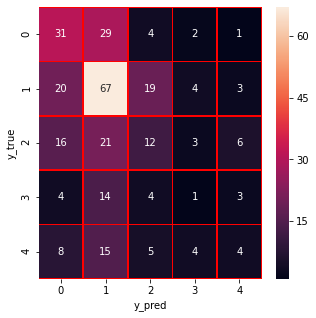

In [38]:
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


# Decision Tree

In [39]:
# %% train test split
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 40)


In [40]:
#%%
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [41]:
print("Decision Tree algorithm accuracy: ", dt.score(x_test,y_test))


Decision Tree algorithm accuracy:  0.30666666666666664


In [42]:
#CONFUSİON MATRİX FOR DESICION TREE
y_pred = dt.predict(x_test)
y_true = y_test
#%% confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)


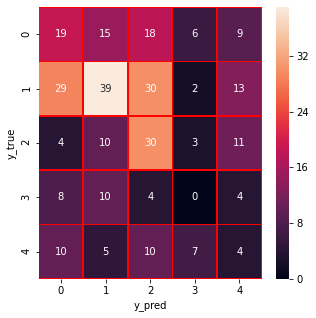

In [43]:
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Random Forest 


In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf = RandomForestClassifier(n_estimators = 100,random_state = 1)
rf.fit(x_train,y_train)
print("Random Forest algorithm accuracy: ",rf.score(x_test,y_test))

Random Forest algorithm accuracy:  0.41


In [46]:
#CONFUSİON MATRİX FOR RANDOM FOREST
y_pred = rf.predict(x_test)
y_true = y_test
#%% confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)


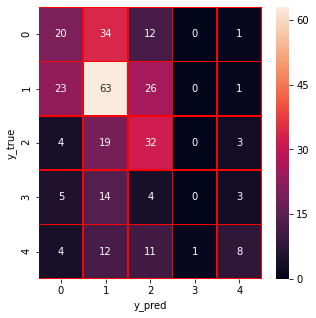

In [47]:
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Linear SVM algorithm


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
model = LinearSVC()
x_train, x_test, y_train, y_test, indices_train, indices_test = train_test_split(x, y, Entries_list, test_size=0.2, random_state=40)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [49]:
print("Linear SVM algorithm accuracy: ",model.score(x_test,y_test))

Linear SVM algorithm accuracy:  0.35


In [50]:
#CONFUSİON MATRİX FOR RANDOM FOREST
y_pred = model.predict(x_test)
y_true = y_test
#%% confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)

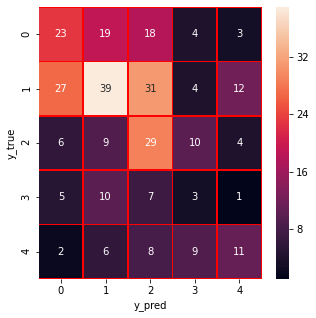

In [51]:
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
